# Unit 13 - Estimators

## Coin flips

Suppose we have a coin and we flip it six times, obtaining the following sequence: 1 0 0 1 0 1 (where 1 = heads, 0 = tails). What would we say if we were asked what $P(H)$ is for this coin? Given the sequence of flips, we would guess $P(H)$ = 0.5.

If we have a different coin and we flip it five times, obtaining 1 1 0 1 1, we would now guess $P(H)$ = 4/5 = 0.8. We're calculating the **empirical frequency**, that is, based on observations.

Using the same method, for a coin which only comes up tails in seven flips, we would guess $P(H)$ = 0.

If we label our sequence of data $x_1, x_2, \dots x_N$ what we are calculating is the sum of the outcomes, divided the total number of experiments:

$$\frac{1}{N} \sum_i x_i$$

this number is always between 0 and 1 and is called the **maximum likelihood estimator** (MLE). We are using it to *estimate* the underlying probability which may be generating the observed sequence.

## Roll of a die

Now let's imagine we have a six-sided die, which we roll 10 times obtaining the following sequence: 1 6 6 3 2 6 5 4 6 2. What is the probability of each one of the possible rolls of the die? We use the MLE again:

In [1]:
from __future__ import print_function, division

print("P(1) = {}".format(1/10))
print("P(2) = {}".format(2/10))
print("P(3) = {}".format(1/10))
print("P(4) = {}".format(1/10))
print("P(5) = {}".format(1/10))
print("P(6) = {}".format(4/10))

P(1) = 0.1
P(2) = 0.2
P(3) = 0.1
P(4) = 0.1
P(5) = 0.1
P(6) = 0.4


If we add them up, the result is 1. 

## Maximum likelihood estimator

The **estimation problem** is: given data, find the probability $P$. Previously we had the inverse problem: given a fixed probability $P$, calculate the probability of the observed data.

Let's consider the following sequence of coin flips: 1 0 1. Let's calculate the probability of obtaining that sequence for values of $P(H)$ in the possible range, and then plot them.

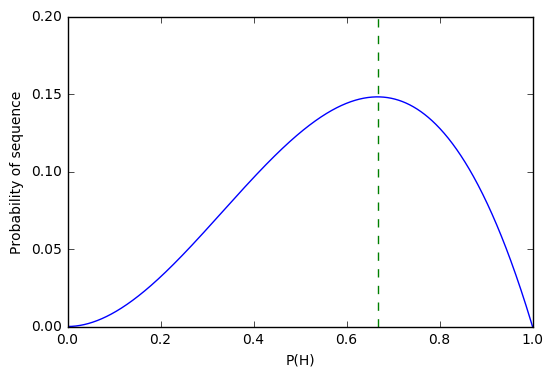

In [9]:
import matplotlib.pyplot as plt
import numpy as np

pcoin = [x / 1000 for x in range(0, 1001)]
probs = [p*(1-p)*p for p in pcoin]

x = np.array(pcoin)
y = np.array(probs)

plt.plot(x, y)
plt.xlim(0, 1)
plt.xlabel("P(H)")
plt.ylabel("Probability of sequence")
plt.ylim(0,0.2)

plt.plot((2/3, 2/3), (0, 0.2), '--')
plt.show();

As $P(H)$ increases from zero, the probability of observing the 1 0 1 sequence increases up to a maximum and then decreases. The maximum value is reached when $P(H)$ = 2/3, the value of the MLE (shown with a dashed green line in the plot); hence its name.

## Weakness of the MLE

Say we pick a fair coin, and we flip it **only once**. If we obtain 1, the MLE would say we have $P(H)$ = 1, and if we get 0 we would have $P(H)$ = 0. *This for the same coin!* For a single coin flip, the MLE will **always** assume the coin is loaded.

If we now consider an odd number of flips we will always have different numbers of heads and tails. Thus, in that case the MLE will also always assume the coin is biased.

The solution is to *add fake data points*. In the case of only one flip, add two extra points: one heads, one tails.

In [3]:
print("Original MLE: P = 1")
print("With fake data: P = {}".format(2/3))

Original MLE: P = 1
With fake data: P = 0.666666666667


For the case of the 0 0 1 sequence:

In [4]:
print("Original MLE: P = {}".format(1/3))
print("With fake data: P = {}".format(2/5))

Original MLE: P = 0.333333333333
With fake data: P = 0.4


Now for 1 0 1 0:

In [5]:
print("Original MLE: P = {}".format(2/4))
print("With fake data: P = {}".format(3/6))

Original MLE: P = 0.5
With fake data: P = 0.5


Finally, for 1 1:

In [6]:
print("Original MLE: P = {}".format(2/2))
print("With fake data: P = {}".format(3/4))

Original MLE: P = 1.0
With fake data: P = 0.75


The new estimator "pulls" the original MLE results towards 0.5. Also, for a single observation of heads, say, we wouldn't like to say "this coin will always come up heads"; it's possible, but not certain. Now, if we get heads twice in a row, then we would say it's more likely that the coin is biased towards coming up heads. With the new estimator, a single observation of heads does not result in 1, and the estimator for two heads in a row is higher - as we would like it to be.

The method of adding fake data is called **Laplacian estimator**. It is much better than the MLE when data is scarce, and tends to the same result as the MLE for many datapoints.

## Dice example

Say we observe the following sequence: 1 2 3 2. For the Laplacian estimator, we now have to add one data point for each of the six possible outcomes.

In [7]:
print("MLE: P(1) = {}".format(1/4))
print("Laplace: P(1) = {}".format(2/10))

MLE: P(1) = 0.25
Laplace: P(1) = 0.2


In [8]:
print("MLE: P(2) = {}".format(2/4))
print("Laplace: P(2) = {}".format(3/10))

MLE: P(2) = 0.5
Laplace: P(2) = 0.3


## Laplace estimator

The Laplace estimator's formula is

$$\frac{1}{N + k} \left(1 + \sum_i x_i\right)$$

where $k$ is the number of possible outcomes and $N$ is the total number of experiments.

Faking data gives better results!